In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


'automobile'

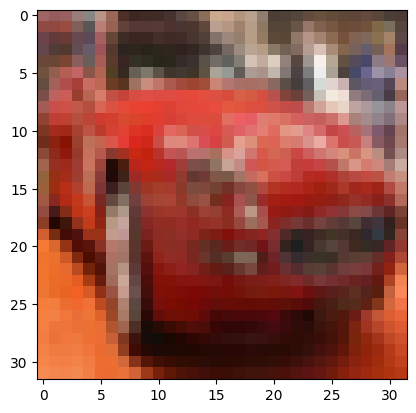

In [2]:
(trainX , trainY) , (testX , testY) = cifar10.load_data()
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]
trainY = np.array([i[0] for i in trainY])   #Converting the labelled data from 2D to 1D : [[6],[5],..] -> [6,5,...]
testY = np.array([i[0] for i in testY])
plt.imshow(trainX[5])
class_labels[trainY[5]]


# Feature Scaling so that pixels lie between 0 and 1

In [3]:
trainX_scaled,testX_scaled = trainX/255.0 , testX/255.0  #Maxi,um pixel value is 255
trainX_scaled.shape

(50000, 32, 32, 3)

**For Binary Classification , we can use either Sigmoid (giving a single probability between 0 and 1) with a single output neuron or Softmax (gives probability corresponding to class 0 and class 1) with 2 Output Neurons and for Multi-Class classification , we have to use only SoftMax.**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3072,activation='relu'),
    # tf.keras.layers.Dropout(0.3), # Added dropout for regularization(dropping same parameters to reduce overfitting)
    tf.keras.layers.Dense(1000,activation='relu'),
    # tf.keras.layers.Dropout(0.3), # Added dropout for regularization
    # tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid') # softmax for multi-class classification
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

# Converting the Class Labels into One Hot Encoded
like 3 -> [0,0,0,1,0,0,0,0,0]

In [5]:
train_encodedY,test_encodedY = tf.keras.utils.to_categorical(trainY), tf.keras.utils.to_categorical(testY)
train_encodedY.shape

(50000, 10)

# **Insights into the TRAINING PROCESS**

1.   *Validation Data is 20% of original data which means before each epoch  20% = 10000 data is kept aside for validation and trained on 40,000 data.*  This Validation is IGNORED here
2.   *Batch Size = 32(default) means for each epoch , 40,000/32 = 1250 iterations/updates are done.*



In [7]:
model.fit(trainX_scaled,train_encodedY,epochs= 50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6431 - loss: 1.0000
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6437 - loss: 0.9957
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6435 - loss: 0.9957
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6448 - loss: 0.9830
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6501 - loss: 0.9645
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6423 - loss: 0.9928
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6469 - loss: 0.9705
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6537 - loss: 0.9656
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6541 - loss: 0.9626
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6499 - loss: 0.9645
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6529 - loss: 0.9620
Epoch 12/50
1563/1563 ━━━━━━━━

In [29]:
print(f"Predicted class is : {class_labels[np.argmax(model.predict(trainX)[7])]}")
print(f"True class is {class_labels[trainY[7]]}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Predicted class is : horse
True class is horse


# Since this model is based on Feed Forward Neural Network , it shows highly overfitting and performs very poorly on unseen data , that's why prediction is done on training data and not test data

# Why a Feed-Forward Neural Network Overfits More on RGB Images than Grayscale

---

## 1️⃣ Input Dimensionality Explosion (Curse of Dimensionality)

### What “same dataset” means

**“Same dataset” does NOT mean**:
- Using grayscale images to train an RGB model

It means:
- **Same number of training samples**
- Same number of images

### Example

- **Case A:** 10,000 grayscale images  
- **Case B:** 10,000 RGB images  

The images are colored in Case B, but the **dataset size (number of samples)** is unchanged.

---

### What “same number of neurons” means

You keep the **same network architecture**, except the input layer automatically grows due to RGB.

| Layer   | Grayscale            | RGB                     |
|--------|----------------------|-------------------------|
| Input  | 28 × 28 = 784        | 28 × 28 × 3 = 2352      |
| Hidden | 512 neurons          | 512 neurons (same)      |

You did **not intentionally increase neurons**, but the number of **parameters increases**.

---

### Why parameters increase even though the dataset is colored

#### Grayscale case

First dense layer:

\[
784 x 512 = 401{,}408 x{ weights}
\]

#### RGB case

First dense layer:

\[
2352 x 512 = 1{,}204{,}224 x{ weights}
\]

➡️ **3× more parameters**, even though:
- Same number of images
- Same number of hidden neurons
- Same task

This is the **key point**.

---

### Why this causes overfitting (statistical view)

Generalization depends roughly on the ratio:

$
\frac{\text{Number of parameters}}{\text{Number of training samples}}
$

When going from **grayscale → RGB**:
- Parameters ↑↑↑
- Samples = constant

So:
- Model capacity ↑
- Variance ↑
- Overfitting ↑

This happens **even if the RGB data is correct and meaningful**.

---

## 2️⃣ FFNN Ignores Spatial Structure (Hurts More for RGB)

A feed-forward neural network treats **each pixel as independent**:

- Pixel `(10, 10, R)` has no relation to `(10, 11, R)`
- No relation between `R`, `G`, and `B` at the same location

### Why this is tolerable for 1-channel images

- Less redundancy
- Lower complexity
- Often simpler patterns (edges, blobs)

### Why this is problematic for 3-channel images

- RGB channels are **highly correlated**
- FFNN learns **separate weights** for each channel
- No weight sharing or structural bias

➡️ Leads to **memorization instead of generalization**

The model learns **training-specific color patterns**, not robust features.

---

## 3️⃣ Color Information Increases Noise and Spurious Correlations

Color introduces:
- Lighting variation
- Shadows
- Camera sensor artifacts
- Background color correlations

A dense network may learn rules like:

> “If the background is slightly blue → class A”

This works on training data but fails on unseen data, leading to:
- High training accuracy
- Low test accuracy

➡️ **Classic overfitting signature**

---

## 4️⃣ What “Redundancy” Means (Precise Definition)

**Redundancy** = repeated or correlated information that does **not add new independent degrees of freedom**.

Mathematically:
- If knowing feature **A** almost determines feature **B**, then **B is redundant**
- Independent information increases effective dimensionality
- Redundant information inflates dimensionality **without increasing true information**

---

## 5️⃣ Redundancy in 3-Channel (RGB) Images

At a single pixel location \((x, y)\), RGB provides:

$
(R, G, B)
$

In natural images:
- $( R \approx G \approx B )$
- Strong **inter-channel correlation**

### Example

**Gray wall:**
(120, 121, 119)


**Shadow:**
(80, 79, 81)


These encode **almost the same information three times**.

So instead of **3 independent variables**, you effectively have:

\[
\text{Intensity} + \text{small color variation}
\]

---

## 6️⃣ Why Redundancy Is Lower in 1-Channel Images

In grayscale:
- Each pixel has **exactly one degree of freedom**
- No duplicated encoding of intensity
- No inter-channel correlation

So:
- Input dimensionality ≈ true information dimensionality

In RGB:
- Input dimensionality = 3×
- True information dimensionality ≪ 3×

➡️ **Redundancy is higher in RGB**

---

## 7️⃣ Key Insight

> **Grayscale removes inter-channel redundancy, making the input dimensionality closer to the true information content — which helps a feed-forward neural network generalize better.**

---

## ✅ Final Takeaway

- RGB increases **dimensionality and redundancy**
- FFNN cannot exploit spatial or channel correlations
- Parameter count explodes without structural bias
- Overfitting becomes inevitable unless:
  - Dataset size increases dramatically
  - Strong regularization is applied
  - Or a CNN is used instead
